Bachelor thesis - Richard Borschke - 7337876 - University of Cologne - A spatio-temporal analysis of usage patterns in free-floating shared mobility


# Clustering Trip Types

This notebook contains the identification of trip types. Following steps are performed:
* Data scaling
* Clustering of trip types
* Evaluation of clustering results
* Distribution of identified trip types among mobility modes

### Imports

In [1]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

### Load Data

In [2]:
# load monthly data of mode based on selected months
def load_data(mode, months):
    first_read = True
    
    for month in months:
        data_month = pd.concat([pd.read_csv(file) for file in glob.glob('Data/Modes/data_supplemented_{}_{}.csv'.format(mode, month))], ignore_index = True)
        if (first_read):
            data_full = data_month
            first_read = False
        else:
            data_full = pd.concat([data_full, data_month], ignore_index=True)
    
    return data_full

# load full data of mode
def load_data_mode_full(mode):
    data_mode_full = pd.read_csv('Data/Modes/data_supplemented_full_{}.csv'.format(mode))
    
    return data_mode_full

In [3]:
# define months for data loading (YYYYMM)
months = ['201911', '201912', '202001', '202002']

#load data by months
load_monthly_data = False

if (load_monthly_data):
    data_car = load_data('car', months)
    data_bicycle = load_data('bicycle', months)
    data_scooter = load_data('scooter', months)
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [4]:
# read in desired data
# set True if full data set load is desired
load_full_data = True

if (load_full_data):
    data_car = load_data_mode_full('car')
    data_bicycle = load_data_mode_full('bicycle')
    data_scooter = load_data_mode_full('scooter')
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410295 entries, 0 to 410294
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   410295 non-null  object 
 1   provider                             410295 non-null  object 
 2   vehicleType                          410295 non-null  object 
 3   date_start                           410295 non-null  object 
 4   time_start                           410295 non-null  int64  
 5   date_end                             410295 non-null  object 
 6   time_end                             410295 non-null  int64  
 7   year                                 410295 non-null  int64  
 8   month                                410295 non-null  int64  
 9   weekday                              410295 non-null  int64  
 10  hour                                 410295 non-null  int64  
 11  weekend      

### Data preparation for clustering

In [6]:
data = data_full.copy()

# binary dummies for time basket column
#dummy = pd.get_dummies(data['time_basket'])



# merge normalized df with dummy df
#data = data.merge(dummy, right_index = True, left_index = True)




# dropping features
data.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)
# time_start and weekday and weekend XOR time basketabs

#'time_start',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

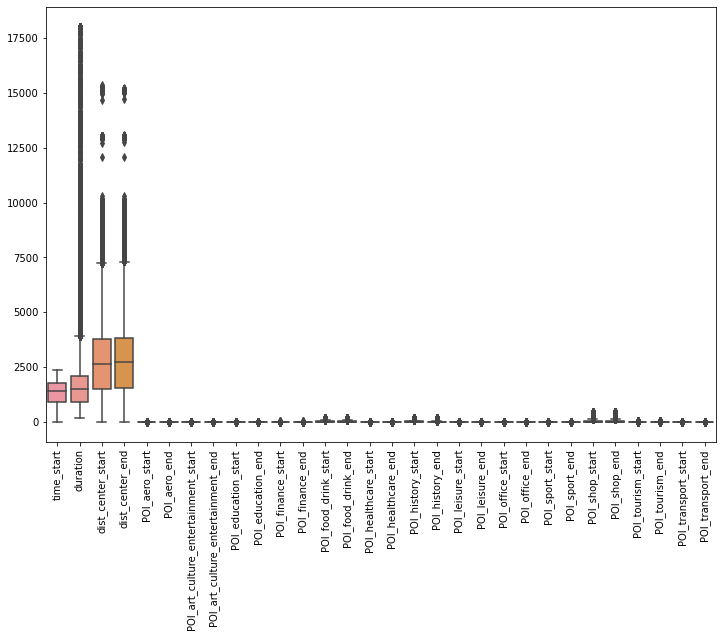

In [7]:
# 
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [8]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

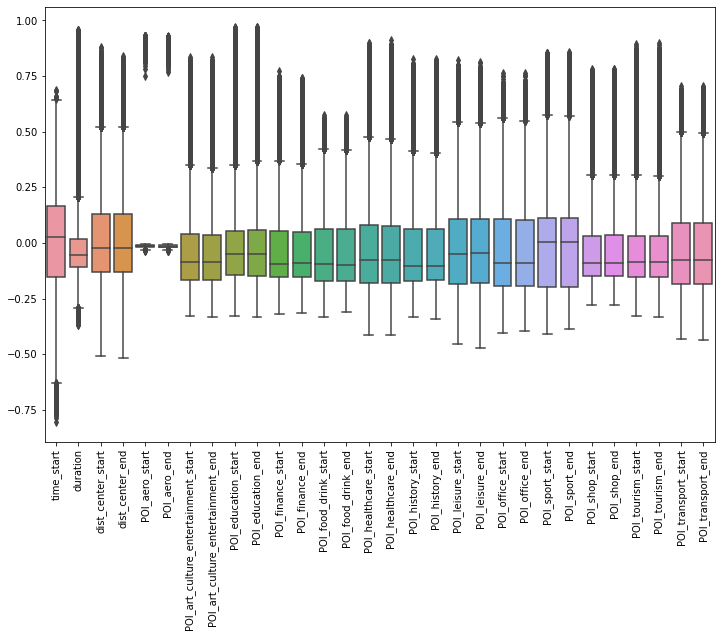

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)

### Cluster Tendency

In [10]:
from pyclustertend import hopkins
#from sklearn.preprocessing import scale
#X = scale(datasets.load_iris().data)
hopkins(normalized_df,1500)

0.11173257857856189

In [11]:
# merge normalized df with dummy df
#normalized_df = normalized_df.merge(dummy, right_index = True, left_index = True)
#normalized_df.info()

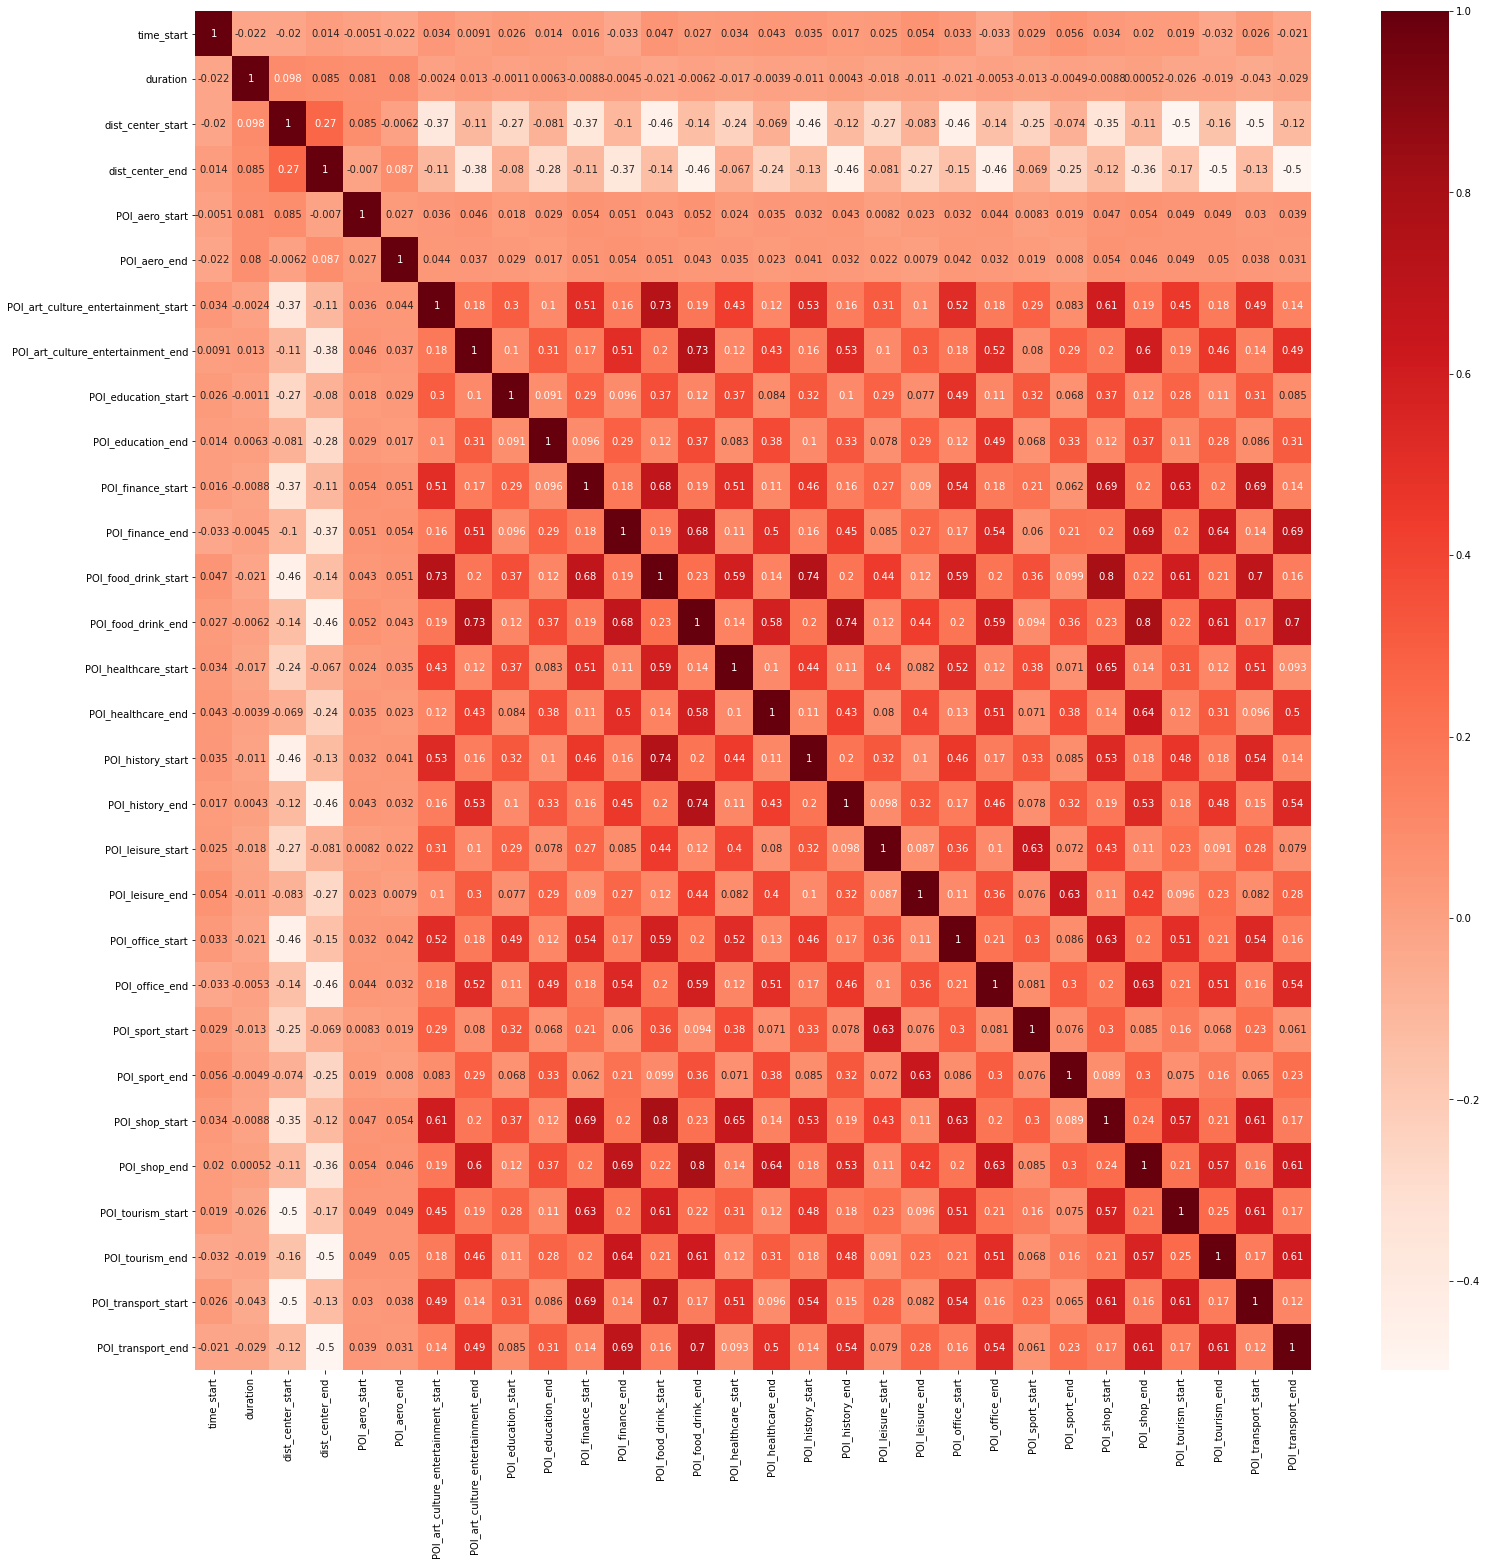

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
df_sample = normalized_df.sample(n=10000, random_state=1)
df_sample

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_start,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end
90054,0.046629,-0.007729,-0.034783,-0.108066,-0.006852,-0.006998,0.005329,0.188808,0.021570,0.163917,...,0.087624,0.314585,0.089611,0.003509,0.063346,0.575234,-0.008906,0.225603,0.217146,0.183971
34736,-0.228841,-0.022341,0.256063,0.267276,-0.018858,-0.019260,-0.085293,0.016471,-0.189020,0.193748,...,-0.258982,0.136802,-0.230324,0.009659,-0.180263,-0.166427,-0.078461,-0.128846,-0.271860,-0.216407
209618,-0.338404,0.013950,0.202792,0.527667,-0.014663,-0.014976,-0.144046,-0.143696,-0.146975,-0.049497,...,-0.158164,-0.198865,-0.179092,-0.178138,-0.124319,-0.142303,-0.102958,-0.141829,-0.131847,-0.208412
319295,-0.164903,-0.069809,-0.078790,-0.090132,-0.007233,-0.007388,0.158994,0.508135,0.022772,-0.024416,...,0.113820,0.224555,0.094602,-0.087875,0.121593,0.133362,0.197534,0.032747,0.190003,0.035804
78917,0.027646,-0.073644,-0.387623,0.334683,-0.023164,-0.023658,0.018017,-0.103385,0.072925,-0.236282,...,-0.181595,-0.245269,-0.282918,0.011865,-0.031170,-0.173873,0.301240,-0.158267,0.231507,-0.202410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206558,-0.418230,0.152776,-0.002236,0.327041,-0.020920,-0.021366,-0.205512,0.018272,0.065860,0.072159,...,-0.225653,-0.034874,-0.255511,0.010715,0.008023,-0.193825,-0.146891,-0.202347,-0.244848,-0.297343
345601,0.042029,-0.041536,-0.112143,-0.120517,-0.005496,-0.005613,0.120806,0.180780,0.017302,0.018957,...,0.151267,0.121590,0.071880,0.072399,0.195737,0.130331,0.291601,0.368265,0.218901,0.012159
367065,0.244546,-0.186137,0.057497,-0.096683,-0.019259,-0.019669,-0.189189,-0.085954,-0.193036,-0.196444,...,-0.207731,-0.261187,-0.235218,-0.233965,-0.188255,-0.174197,-0.190321,-0.076890,-0.277636,-0.062839
99035,0.244214,-0.138935,-0.016941,0.129996,-0.018419,-0.018811,-0.083305,-0.082204,-0.184614,0.063530,...,-0.090114,-0.195020,0.007966,0.475818,-0.120328,-0.154449,-0.076633,-0.125843,0.084166,-0.160941


### K-means

In [14]:
#KMeans Clustering
#Defining WCSS Elbow point
from sklearn.cluster import KMeans
import time

wcss=[]
for i in range (1,30):
    start = time.time()
    kmeans = KMeans(i)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)
    end = time.time()
    print(i)
    print(end - start)
wcss

1
0.08078312873840332
2
0.20844268798828125
3
0.49866628646850586
4
0.6263253688812256
5
0.7634680271148682
6
0.8118290901184082
7
0.871671199798584
8
1.0392215251922607
9
1.299525499343872
10
1.1738615036010742
11
1.2097671031951904
12
1.203779935836792
13
1.6191802024841309
14
2.173191785812378
15
2.970078706741333
16
1.967738151550293
17
2.4669110774993896
18
2.52325439453125
19
2.3532214164733887
20
3.0897395610809326
21
3.240846872329712
22
3.4727160930633545
23
2.9580914974212646
24
3.461775302886963
25
4.353396892547607
26
3.8771116733551025
27
4.1484222412109375
28
3.5470242500305176
29
3.673684597015381


[9752.47492162763,
 7654.644782269701,
 6665.532526499762,
 6289.178318395091,
 6035.138726342338,
 5821.675056273601,
 5635.906803225035,
 5506.744859228496,
 5399.3848977349135,
 5284.0833811616085,
 5172.853630051457,
 5068.509189765364,
 4954.382480389615,
 4873.296781053808,
 4789.478335901537,
 4718.109457299707,
 4653.326790301109,
 4592.702321243216,
 4542.613740883032,
 4476.009965892019,
 4428.1882905995035,
 4383.692630324607,
 4338.750607028416,
 4304.63609980907,
 4264.99622276287,
 4226.252658099238,
 4195.503621126693,
 4175.133572978881,
 4118.683963638377]

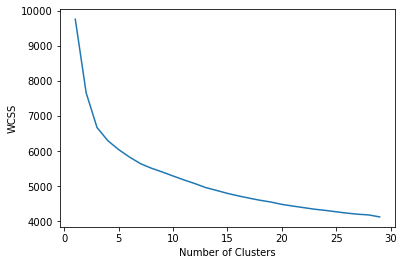

In [15]:
#Elbow Plot
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

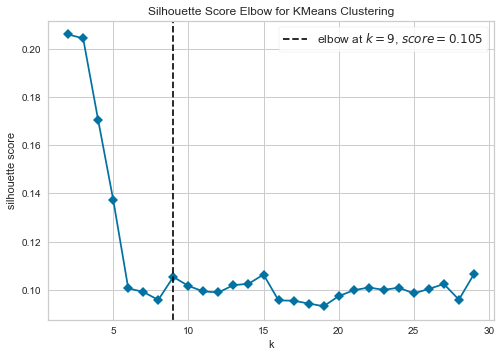

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_sample)    
visualizer.poof()

In [17]:
k = 9
k_means_new=KMeans(k)
kmeans.fit(df_sample)
cluster_new = df_sample.copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(df_sample)
cluster_new

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,cluster_pred
90054,0.046629,-0.007729,-0.034783,-0.108066,-0.006852,-0.006998,0.005329,0.188808,0.021570,0.163917,...,0.314585,0.089611,0.003509,0.063346,0.575234,-0.008906,0.225603,0.217146,0.183971,1
34736,-0.228841,-0.022341,0.256063,0.267276,-0.018858,-0.019260,-0.085293,0.016471,-0.189020,0.193748,...,0.136802,-0.230324,0.009659,-0.180263,-0.166427,-0.078461,-0.128846,-0.271860,-0.216407,2
209618,-0.338404,0.013950,0.202792,0.527667,-0.014663,-0.014976,-0.144046,-0.143696,-0.146975,-0.049497,...,-0.198865,-0.179092,-0.178138,-0.124319,-0.142303,-0.102958,-0.141829,-0.131847,-0.208412,6
319295,-0.164903,-0.069809,-0.078790,-0.090132,-0.007233,-0.007388,0.158994,0.508135,0.022772,-0.024416,...,0.224555,0.094602,-0.087875,0.121593,0.133362,0.197534,0.032747,0.190003,0.035804,1
78917,0.027646,-0.073644,-0.387623,0.334683,-0.023164,-0.023658,0.018017,-0.103385,0.072925,-0.236282,...,-0.245269,-0.282918,0.011865,-0.031170,-0.173873,0.301240,-0.158267,0.231507,-0.202410,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206558,-0.418230,0.152776,-0.002236,0.327041,-0.020920,-0.021366,-0.205512,0.018272,0.065860,0.072159,...,-0.034874,-0.255511,0.010715,0.008023,-0.193825,-0.146891,-0.202347,-0.244848,-0.297343,6
345601,0.042029,-0.041536,-0.112143,-0.120517,-0.005496,-0.005613,0.120806,0.180780,0.017302,0.018957,...,0.121590,0.071880,0.072399,0.195737,0.130331,0.291601,0.368265,0.218901,0.012159,1
367065,0.244546,-0.186137,0.057497,-0.096683,-0.019259,-0.019669,-0.189189,-0.085954,-0.193036,-0.196444,...,-0.261187,-0.235218,-0.233965,-0.188255,-0.174197,-0.190321,-0.076890,-0.277636,-0.062839,5
99035,0.244214,-0.138935,-0.016941,0.129996,-0.018419,-0.018811,-0.083305,-0.082204,-0.184614,0.063530,...,-0.195020,0.007966,0.475818,-0.120328,-0.154449,-0.076633,-0.125843,0.084166,-0.160941,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

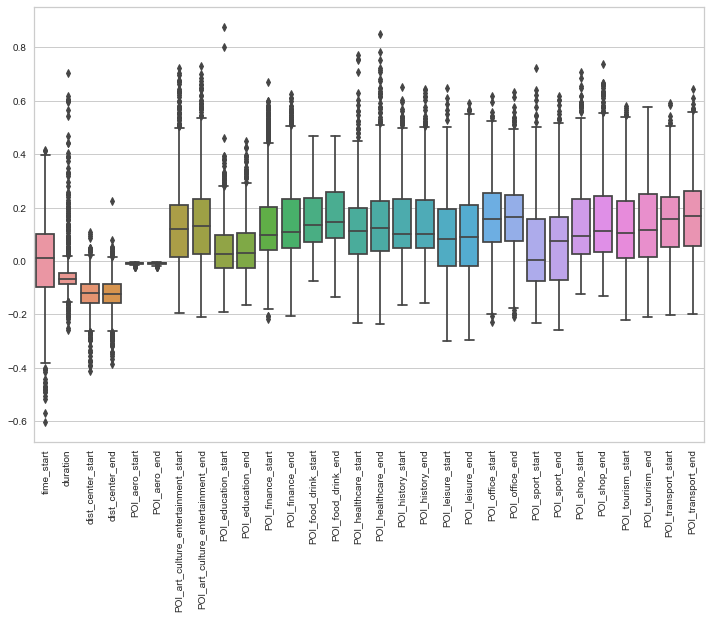

In [18]:
cluster = cluster_new[cluster_new['cluster_pred']==1].copy()
cluster = cluster.drop(['cluster_pred'], axis = 1)
plt.figure(figsize=(12,8))
sns.boxplot(data=cluster)
plt.xticks(rotation=90)

### K-prototypes

In [19]:
data_proto = data_full.copy()
data_basket = data_proto['time_basket'].copy()

# dropping features
data_proto.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)

In [20]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data_proto.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_data = scaler.fit_transform(data_proto)
scaled_data = pd.DataFrame(scaled_data, columns=names)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data,columns=names) 

In [21]:
normalized_data = normalized_data.merge(data_basket, right_index = True, left_index = True)

In [41]:
#type(full_d)



,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,POI_finance_start,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,time_basket
90054,1807.0,2281,1028,0,0,2,7,2,5,6,...,20,2,1,88,426,3,15,17,15,evening_peak_time
34736,1799.0,4507,4618,0,0,1,2,0,3,0,...,7,0,1,1,4,2,1,0,1,weekday_daytime
209618,2101.0,4537,7233,0,0,0,0,0,1,1,...,0,0,0,6,0,1,0,2,0,morning_peak_time
319295,602.0,1587,1425,0,0,6,15,2,1,5,...,15,2,0,123,128,13,5,15,7,morning_peak_time
78917,1517.0,890,4651,0,0,2,1,2,0,0,...,1,0,1,39,10,8,1,9,2,weekday_daytime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206558,2999.0,2874,4793,0,0,0,2,2,2,0,...,4,0,1,47,2,1,0,1,0,morning_peak_time
345601,898.0,452,290,0,0,6,8,2,2,25,...,12,2,2,210,152,22,27,20,6,weekend_daytime
367065,600.0,3243,2317,0,0,0,1,0,0,0,...,0,0,0,0,3,0,2,0,4,evening_peak_time
99035,900.0,2777,3765,0,0,1,1,0,2,0,...,1,1,3,15,6,2,1,7,2,evening_peak_time


C:\Users\User_Vratar\Anaconda3\lib\site-packages\umap\umap_.py:1530: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


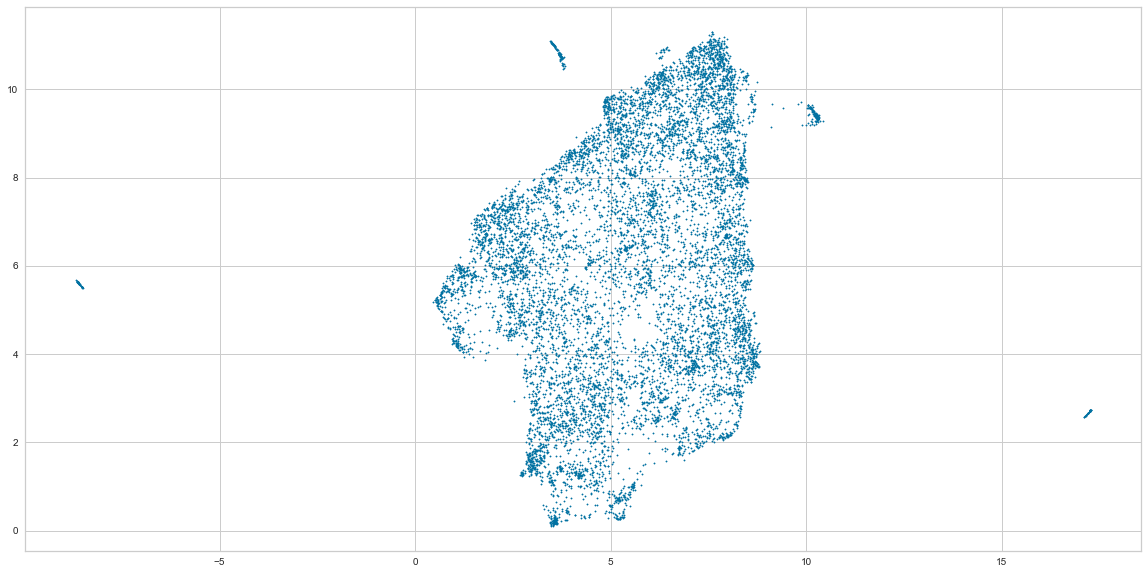

In [48]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import umap
full_data1 = data_full.copy()
full_data2 = full_data1.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start',
           'weekday', 'weekend'], axis=1)
full_data = full_data2.sample(n=50000, random_state=1).copy()


#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='object').copy()

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 10))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()